In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

def save_params(parameters, file):
    with open(file, 'wb') as f:
        pickle.dump(parameters, f)

def load_params(file):
    with open(file, 'rb') as f:
        parameters = pickle.load(f)
    return parameters

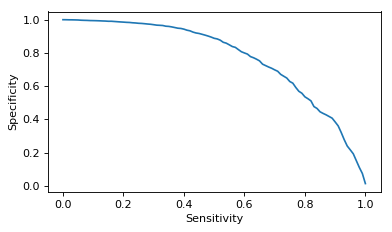

In [6]:
params = load_params('specAndsens_final.pkl')
sens = params[0]
specs = params[1]


plt.figure(num=None, figsize=(5, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sens,specs)
plt.xlabel('Sensitivity')
plt.ylabel('Specificity')
plt.tight_layout()
plt.savefig('sens_spec_figure.png')
plt.show()

In [ ]:
average_conf_mat = [[.805, .02333],[0.1,.071666]]

(1000,)
[ 0.00774362 -0.01109694  0.01098853 -0.00132516 -0.00260519  0.00702594
 -0.0054315  -0.0027897   0.00680439  0.00279195]
(511,)
0.000273793


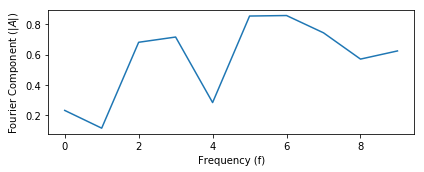

In [89]:
X = load_params("best_X_params.pkl")
X_mag = np.mean(X, axis = 2)
X_mag = np.mean(np.mean(X_mag, axis = 2), axis = 0)
print(X_mag.shape)
print(X_mag[0:10])
X_fft = np.real(np.fft.fft(X_mag, n = 1024))
print(X_fft[1:512].shape)
X_fft_back = np.flip(X_fft[1:512],axis = 0)
X_fft_pos = X_fft_back+X_fft[513:1024]
X_fft = np.insert(X_fft_pos,0,X_fft[512])
print(np.mean(X_mag))

plt.close('all')
plt.figure(figsize=(6,2.5))
plt.plot(np.abs(X_fft[0:10]))
plt.ylabel("Fourier Component (|$A$|)")
plt.xlabel("Frequency (f)")
plt.tight_layout()
plt.savefig("cs230_fourier_generate_X.png")
plt.show()

[0 1 2 3 2 1 1 1 3 0 2 3 3 1 2 2 1 3 3 0 2 1 2 1 0 1 2 3 1 1 1 2 2 2 0 2 1
 0 2 0 2 3 2 1 3 2 1 3 0 1 0 1 1 2 3 0 1 0 2 2 1 3 2 1 0 2 3 3 2 2 1 3 2 0
 1 2 1 3 1 2 0 3 3 0 3 0 1 3 0 3 0 1 0 2 3 2 0 1 0 0 1]


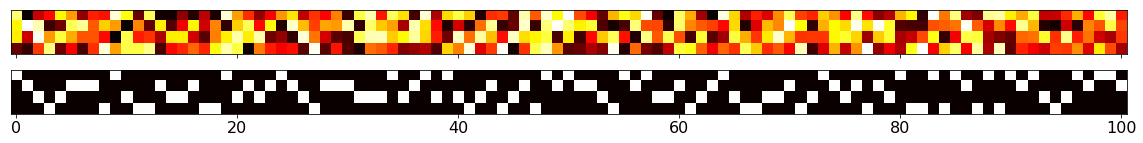

In [70]:
X = np.mean(np.mean(load_params("best_X_params.pkl"),axis = 3), axis = 0)[0:101]
X_hot = np.argmax(X, axis = 1)
print(X_hot)
X_bin = np.zeros((X.shape))
X_bin[np.arange(X.shape[0]),X_hot] = 1
plt.close('all')
plt.figure(figsize = (20,2))
plt.subplot(212)
plt.imshow(X_bin.T, cmap='hot')
ax1 = plt.gca()
ax1.set_yticks([])
ax1.set_xticklabels([-1,0,20,40,60,80,100], fontdict={'fontsize': 16})
plt.subplot(211)
plt.imshow(X.T, cmap='hot')
ax2 = plt.gca()
ax2.set_xticklabels([])
ax2.set_yticks([])
plt.savefig("cs230_generate_X.png")
plt.show()

In [74]:
X = np.mean(np.mean(load_params("best_X_params.pkl"),axis = 3), axis = 0)
print(np.mean(X,axis=0))
X_hot = np.argmax(X, axis = 1)
X_bin = np.zeros((X.shape))
X_bin[np.arange(X.shape[0]),X_hot] = 1
print(np.mean(X_bin,axis=0))

[  6.58127305e-04  -1.66967620e-05   2.62098183e-04   1.91644242e-04]
[ 0.259  0.253  0.249  0.239]


In [95]:
conf_mat_012 = np.array([[7082,  318,    0,  216,    0,    0,    0,  250],
       [ 768,   61,    0,   53,    0,    0,    0,  126],
       [ 170,   25,    0,   20,    0,    0,    0,   44],
       [  88,   13,    0,   12,    0,    0,    0,   40],
       [  30,    5,    0,    2,    0,    0,    0,   11],
       [  15,    3,    0,    1,    0,    0,    0,   19],
       [  66,   16,    0,   11,    0,    0,    0,   45],
       [  61,   13,    0,   24,    0,    0,    0,  392]])

inputSums = np.repeat(np.sum(conf_mat_012,axis=1,keepdims=True),8,axis = 1)
conf_mat_frac_012 = conf_mat_012/inputSums
print(conf_mat_frac_012)

[[ 0.90033054  0.04042715  0.          0.02745995  0.          0.          0.
   0.03178235]
 [ 0.76190476  0.06051587  0.          0.05257937  0.          0.          0.
   0.125     ]
 [ 0.65637066  0.0965251   0.          0.07722008  0.          0.          0.
   0.16988417]
 [ 0.5751634   0.08496732  0.          0.07843137  0.          0.          0.
   0.26143791]
 [ 0.625       0.10416667  0.          0.04166667  0.          0.          0.
   0.22916667]
 [ 0.39473684  0.07894737  0.          0.02631579  0.          0.          0.
   0.5       ]
 [ 0.47826087  0.11594203  0.          0.07971014  0.          0.          0.
   0.32608696]
 [ 0.1244898   0.02653061  0.          0.04897959  0.          0.          0.
   0.8       ]]
